# Lab for answering question A
Responsible: Birgit

In [1]:
import numpy as np
import pandas as pd
import pickle
%run -i utility_functions.py # importing the function from utility_functions.py

In [2]:
transformed_df_a_serial_path = "../data/data_transformed.pickle"

with open(transformed_df_a_serial_path, "rb") as file:
    df_a: pd.DataFrame = pickle.load(file)

assert isinstance(df_a, pd.DataFrame),f"The serialized object in {transformed_df_a_serial_path} is not a pandas dataframe!"
assert len(df_a)!=0, "The serialized dataframe contains no data!"

In [3]:
df_a

,Disaster_Group,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Disaster_Subsubtype,Country,ISO,Region,Continent,Associated_Dis,Associated_Dis2,Start_Year,End_Year,Total_Deaths,Total_Affected
0,Natural,Climatological,Drought,Drought,<NA>,Cabo Verde,CPV,Western Africa,Africa,Famine,<NA>,1900,1900,11000,<NA>
1,Natural,Climatological,Drought,Drought,<NA>,India,IND,Southern Asia,Asia,<NA>,<NA>,1900,1900,1250000,<NA>
2,Natural,Geophysical,Earthquake,Ground movement,<NA>,Guatemala,GTM,Central America,Americas,Tsunami/Tidal wave,<NA>,1902,1902,2000,<NA>
3,Natural,Geophysical,Volcanic activity,Ash fall,<NA>,Guatemala,GTM,Central America,Americas,<NA>,<NA>,1902,1902,1000,<NA>
4,Natural,Geophysical,Volcanic activity,Ash fall,<NA>,Guatemala,GTM,Central America,Americas,<NA>,<NA>,1902,1902,6000,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16483,Natural,Biological,Epidemic,Viral disease,<NA>,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,<NA>,<NA>,2022,2022,8,607
16484,Natural,Biological,Epidemic,Viral disease,<NA>,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,<NA>,<NA>,2022,2022,5,141
16485,Natural,Biological,Epidemic,Viral disease,<NA>,Zimbabwe,ZWE,Eastern Africa,Africa,<NA>,<NA>,2022,2022,750,6551
16486,Natural,Biological,Epidemic,Viral disease,<NA>,Timor-Leste,TLS,South-Eastern Asia,Asia,<NA>,<NA>,2022,2022,20,1353


In [4]:
import matplotlib.pyplot as plt

Create a time series for the number of deaths for different levels of granularity (world, continent, countries of 
interest) 
 Check if there are any trends visible in those series and try to understand if those trends are driven by 
special circumstances (big tsunami, …) or if those trends are persistent 

In [5]:
# new column (decade)
decade = df_a['Start_Year']//10*10 
df_a['Disaster_Decade'] = decade
df_a = df_a.astype({"Total_Deaths": np.float64, "Total_Affected": np.float64, "Start_Year": np.int32, "Disaster_Decade":np.int32})

Regrading the missing death data, we have discussed different options, how/ if to include the number of affected. 
One idea was, to use the number of affected if we do not have the number of deaths. However, this would lead to a big bias in our opinion.
Then we had the idea of looking at the data that has both "no deaths" and "no affected" available. From those data we thought of extracting a percentage with which to multiply the "no affected" to get an approximation for the number of deaths. After thinking about this, we still have the impression, that this would change our data significantly and is not a good approximation, as different disasters can (depending on the serverity) have highly different percentages. 
Therefor we finally decided, even if that meant to leave out about 5.000 data point, to delete the unknown values of deaths and just work with the data where we have definite death numbers - at least for extracting information about the deaths.

In [122]:
print(df_a.sum()['Total_Deaths']/(df_a.max()['Start_Year']-df_a.min()['Start_Year']+1))
cutoff_date = 1922 
df_a_100 = df_a[df_a["Start_Year"] > cutoff_date]
print(df_a_100.sum()['Total_Deaths']/(df_a_100.max()['Start_Year']-df_a_100.min()['Start_Year']+1))
cutoff_date = 1972 
df_a_50 = df_a[df_a["Start_Year"] > cutoff_date]
print(df_a_50.sum()['Total_Deaths']/(df_a_50.max()['Start_Year']-df_a_50.min()['Start_Year']+1))

263944.73983739835
201506.89
65690.92


C:\Users\Birgit\AppData\Local\Temp\ipykernel_16812\3697406073.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.sum()['Total_Deaths']/(df.max()['Start_Year']-df.min()['Start_Year']+1))
C:\Users\Birgit\AppData\Local\Temp\ipykernel_16812\3697406073.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_100.sum()['Total_Deaths']/(df_100.max()['Start_Year']-df_100.min()['Start_Year']+1))
C:\Users\Birgit\AppData\Local\Temp\ipykernel_16812\3697406073.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns befo

Natural disasters killed globally on average 264 thousand people per year over the last 123 years. 
This average lowers to 201,5 thousand when only having a look at the last 100 years.
There died on average 65,7 thousand people per year in the last 50 years.

Text(0.5, 1.0, 'Average of deaths per natural disaster over years')

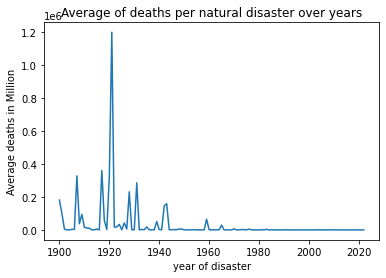

In [27]:
# calc mean deaths per disaster over the years

means = df_a.groupby(["Start_Year"]).mean()['Total_Deaths'].round()
ax = means.plot(kind = 'line')
ax.set_ylabel('Average deaths in Million')
ax.set_xlabel ('year of disaster')
ax.set_title('Average of deaths per natural disaster over years')
#max(means)

The graphic shows how many people died on average per natural disaster per year. As there is only one event with 1.2 million death in 1921 it leads to that big spike. Therefor we decided to use decades instead of years.

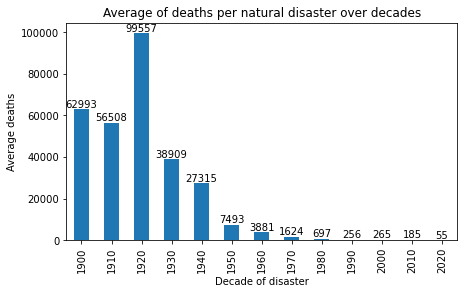

In [64]:
# calc mean deaths, per Decade and plot them in a bar plot
means = df_a.groupby(["Disaster_Decade"]).mean()['Total_Deaths'].round()
ax = means.plot(kind = 'bar', figsize = (7,4))
ax.set_ylabel('Average deaths')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Average of deaths per natural disaster over decades')
ax.bar_label(ax.containers[0])
plt.show()

When having a look at the average deaths per decade per natural disaster, it can be seen that there was a peek in the 1920th and the number of deaths decreased over the years. However, this does not automatically mean that the number of natural disasters is decreasing. 

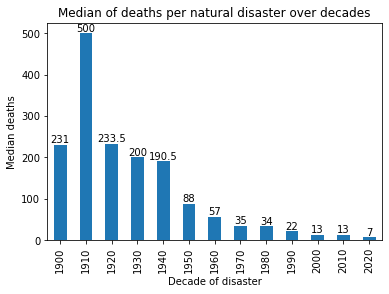

In [56]:
# calc median deaths, per Decade and plot them in a bar plot
medians = df_a.groupby(["Disaster_Decade"]).median()['Total_Deaths']
ax = medians.plot(kind = 'bar', figsize = (6,4))
ax.set_ylabel('Median deaths')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Median of deaths per natural disaster over decades')
ax.bar_label(ax.containers[0])
plt.show()

The median compared to the mean shows that there seem to have been some events in 1920 leading to a really high number of deaths. Still we can see, that the number of deaths have significantly decreased in the last 90 years.

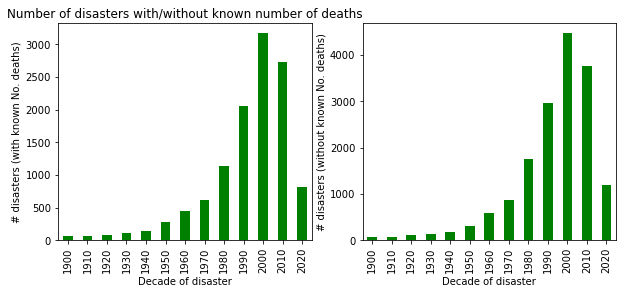

Disaster_Decade
1900      79
1910      77
1920     106
1930     135
1940     170
1950     310
1960     593
1970     871
1980    1755
1990    2957
2000    4473
2010    3758
2020    1204
Name: Continent, dtype: int64
Last Start_year of data : 2022
Hochgerechnete Number of natural disasters 2020-2029: 4214.0


In [103]:
# calc count, per Decade and plot them in a bar plot
counts = df_a.groupby(["Disaster_Decade"]).count()['Total_Deaths']
plt.subplot(1, 2,1)
ax = counts.plot(kind = 'bar', figsize = (6,4), color ="green")
ax.set_ylabel('# disasters (with known No. deaths)')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Number of disasters with/without known number of deaths')
#ax.bar_label(ax.containers[0])

counts = df_a.groupby(["Disaster_Decade"]).count()['Continent'] # continent just used, because then we to not have a look at na values
plt.subplot(1, 2, 2)
ax = counts.plot(kind = 'bar', figsize = (10,4), color ="green")
ax.set_ylabel('# disasters (without known No. deaths)')
ax.set_xlabel ('Decade of disaster')
#ax.bar_label(ax.containers[0])
plt.show()

print(counts)
print("Last Start_year of data : " +str(df_a["Start_Year"].max()))
print( "Hochgerechnete Number of natural disasters 2020-2029: " + str(1204*3.5))

In the last decade, the number of deaths/disasters is of course much smaller, since the data only contain information up to the year 2022. The year 2022 has not yet been fully mapped. This value would have to be multiplied by about 3.5 to get a correct ratio.
Additionally it can be seen, that (as the graphics above have shown) the number of deaths per natural disaster decreased in the last century, but the number of natural disasters has definitifly constantly increased. This could either mean, that there are more natural disasters with a lower impact or that e.g. due to better health care or faster help there are just less people dying and the intensity of the disasters did not change that much.

To look a bit more into that, we decided to have a look at the number of affected.

Disaster_Decade
1900    0.03
1910    0.29
1920    1.86
1930    0.38
1940    0.08
1950    0.24
1960    0.58
1970    0.96
1980    1.11
1990    0.95
2000    0.64
2010    0.59
2020    0.33
Name: No_Affected, dtype: float64


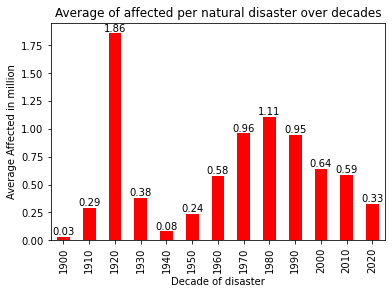

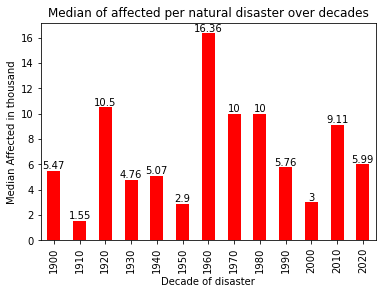

Disaster_Decade
1900     5.47
1910     1.55
1920    10.50
1930     4.76
1940     5.07
1950     2.90
1960    16.36
1970    10.00
1980    10.00
1990     5.76
2000     3.00
2010     9.11
2020     5.99
Name: No_Affected, dtype: float64


In [102]:
# calc mean affected, per Decade and plot them in a bar plot
means_aff = round(df_a.groupby(["Disaster_Decade"]).mean()['Total_Affected'].round()/1_000_000,2)
#plt.subplot(1, 2,1)
ax = means_aff.plot(kind = 'bar', figsize = (6,4), color ="red")
ax.set_ylabel('Average Affected in million')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Average of affected per natural disaster over decades')
print(means_aff)
ax.bar_label(ax.containers[0])
plt.show()

# calc median deaths, per Decade and plot them in a bar plot
medians_aff = round(df_a.groupby(["Disaster_Decade"]).median()['Total_Affected']/1_000,2)
#plt.subplot(1, 2,2)
plt.tight_layout()
ax = medians_aff.plot(kind = 'bar', figsize = (6,4), color ="red")
ax.set_ylabel('Median Affected in thousand')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Median of affected per natural disaster over decades')
ax.bar_label(ax.containers[0])
plt.show()

print(medians_aff)

The number of affected shows a different picture than the one from the number of deaths. This supports our supposition, that less people die but that there are more and more people affected from natural disasters.

In [13]:
data_1920 = df_a.loc[df_a["Disaster_Decade"]==1920]
data_1920.nlargest(6,"Total_Deaths")
#df_a.nlargest(15,"Total_Deaths")

,Disaster_Group,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Disaster_Subsubtype,Country,ISO,Region,Continent,Associated_Dis,Associated_Dis2,Start_Year,End_Year,Total_Deaths,Total_Affected,Disaster_Decade,No_Affected
96,Natural,Climatological,Drought,Drought,<NA>,China,CHN,Eastern Asia,Asia,<NA>,<NA>,1928,1928,3000000.0,NaN,1920,NaN
58,Natural,Biological,Epidemic,Bacterial disease,<NA>,India,IND,Southern Asia,Asia,<NA>,<NA>,1920,1920,2000000.0,NaN,1920,NaN
906,Natural,Climatological,Drought,Drought,<NA>,Soviet Union,SUN,Russian Federation,Europe,Crop failure,Famine,1921,1921,1200000.0,5000000.0,1920,5000000.0
56,Natural,Climatological,Drought,Drought,<NA>,China,CHN,Eastern Asia,Asia,<NA>,<NA>,1920,1920,500000.0,20000000.0,1920,20000000.0
59,Natural,Biological,Epidemic,Bacterial disease,<NA>,India,IND,Southern Asia,Asia,<NA>,<NA>,1920,1920,500000.0,NaN,1920,NaN
85,Natural,Biological,Epidemic,Viral disease,<NA>,India,IND,Southern Asia,Asia,<NA>,<NA>,1926,1926,423000.0,NaN,1920,NaN


Conclusions:
The number of deaths over the last century due to natural disaster has definitly decreased.
The number of natural disasters itself and also the number of people affected by natural disasters however has increased.

Trend Analysis: Have a look, why the number of deaths in the 1920th is so high (5 from the 15 biggest disasters happend in the 1920th)

- Drought in China (1928): more political than natural (warlords using grain for themselves, less production due to opium plantation); Reference: https://disasterhistory.org/the-northwest-china-famine-1928-1930

- Epidemic in India (1920): Encephalitis lethargica; Reference https://simplifiedupsc.in/epidemics-that-have-hit-india-since-1900/

- Drought in Soviet Union (1921): natural and human caused - (Civil War, Russian Revolution: confiscation of stored grain) ; Reference: https://www.norkarussia.info/famine-1921-1924.html

- Viral disease (1926): Spanish flu brought back from soldiers; Reference: https://simplifiedupsc.in/epidemics-that-have-hit-india-since-1900/

- Drought in China (1920): rainless 12 months - total failure of Harvest; Reference: http://disasterhistory.org/north-china-famine-1920-21

Natural disasters in the early 1920s are partly also consequences of the first world war.

In [111]:
#continent
df_a[["Continent", "Total_Deaths"]].groupby(["Continent"]).sum()
#df_a_50[["Continent", "Total_Deaths"]].groupby(["Continent"]).sum()
#df_a[["Continent", "Disaster_Decade","Total_Deaths"]].groupby(["Continent","Disaster_Decade"]).mean()

,Total_Deaths
Continent,
Africa,928757.0
Americas,453975.0
Asia,1693840.0
Europe,200905.0
Oceania,7069.0


Asia an Europe suffered the most from natural disasters in the last 123 years.

Up until now we have used "Start_Year" as the relevant year. Now let's look at how the results change if we distribute the deaths per event equally over all years (from "Start_Year" to "End_Year)

In [15]:
df_a_deaths = get_yearly_deaths(df_a, include_zero=True).to_frame().reset_index()
df_a_deaths

,Year,Total_Deaths
0,1900,1267500.0
1,1901,200018.0
2,1902,48438.0
3,1903,7136.0
4,1904,152.0
...,...,...
118,2018,13832.5
119,2019,23838.166667
120,2020,15690.166667
121,2021,14522.166667


In [112]:
# new column (decade)
decade = df_a_deaths['Year']//10*10 
df_a_deaths['Disaster_Decade'] = decade
df_a_deaths = df_a_deaths.astype({"Total_Deaths": np.float64, "Year": np.int32, "Disaster_Decade":np.int32})
df_a_deaths.sum()['Total_Deaths']/(df_a_deaths.max()['Year']-df_a_deaths.min()['Year']+1)# check, daran verändert sich nichts

263944.7398373984

Text(0.5, 1.0, ' Deaths per year from natural disaster')

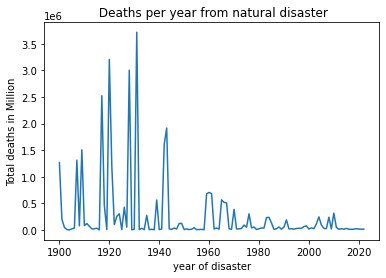

In [17]:
# calc mean deaths, per year and plot them in a bar plot

dth_distr = df_a_deaths.groupby(["Year"]).sum()['Total_Deaths'].round()
ax = dth_distr.plot(kind = 'line')
ax.set_ylabel('Total deaths in Million')
ax.set_xlabel ('year of disaster')
ax.set_title(' Deaths per year from natural disaster')
#max(means)



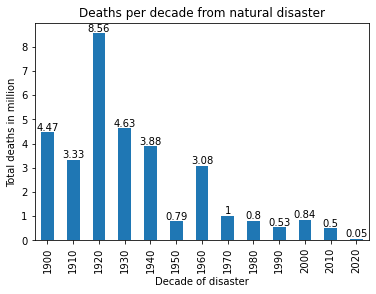

In [96]:
# calc deaths per Decade and plot them in a bar plot
sum_distr = round(df_a_deaths.groupby(["Disaster_Decade"]).sum()['Total_Deaths']/1_000_000,2)
ax = sum_distr.plot(kind = 'bar')
ax.set_ylabel('Total deaths in million')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Deaths per decade from natural disaster')
ax.bar_label(ax.containers[0])
plt.show()
#print(medians_distr)
#print(medians)

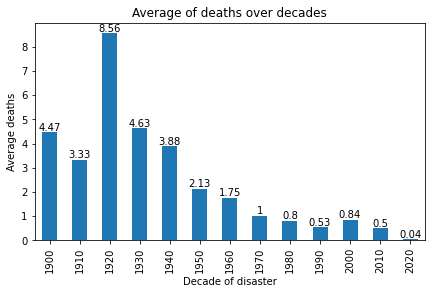

In [99]:
# calc deaths per Decade and plot them in a bar plot without distrubuting between start and end year
means = round(df_a.groupby(["Disaster_Decade"]).sum()['Total_Deaths'].round()/1000000,2)
ax = means.plot(kind = 'bar', figsize = (7,4))
ax.set_ylabel('Average deaths')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Average of deaths over decades')
ax.bar_label(ax.containers[0])
plt.show()